Dataset loaded successfully!

Industry Summary:
     Industry  Avg_Close_Price  Total_Volume  Avg_Market_Cap  Count_Stocks
0  Automotive       724.080000      18388790        0.910000             1
1  E-Commerce       122.490000      19532610        1.290000             1
2  Technology       342.943535    3504606292        1.910404             2

Industry summary saved to 'industry_summary.csv'.


<ipython-input-4-ec2033803d0b>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Industry'].fillna('Unknown', inplace=True)
<ipython-input-4-ec2033803d0b>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='Industry', y='Avg_Close_Price', palette='viridis')


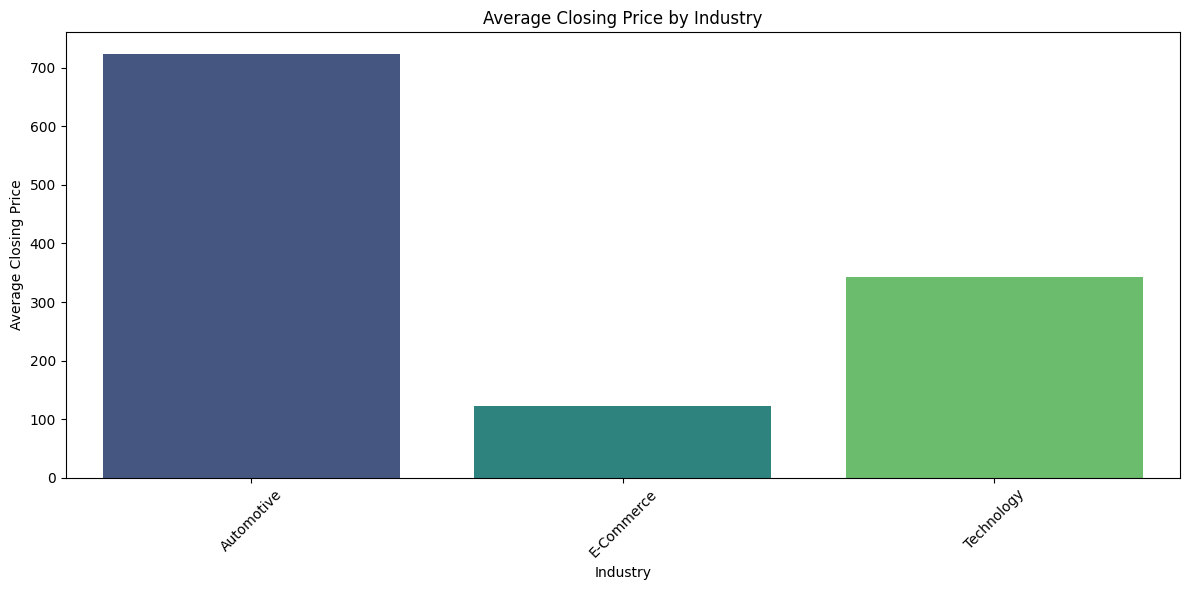

<ipython-input-4-ec2033803d0b>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='Industry', y='Total_Volume', palette='plasma')


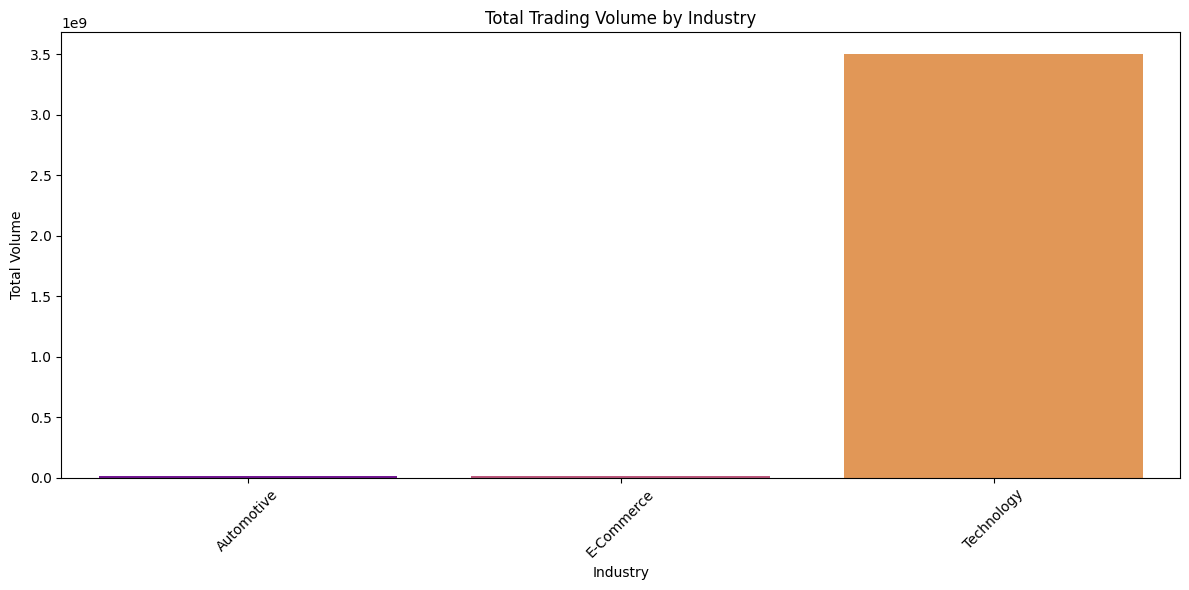

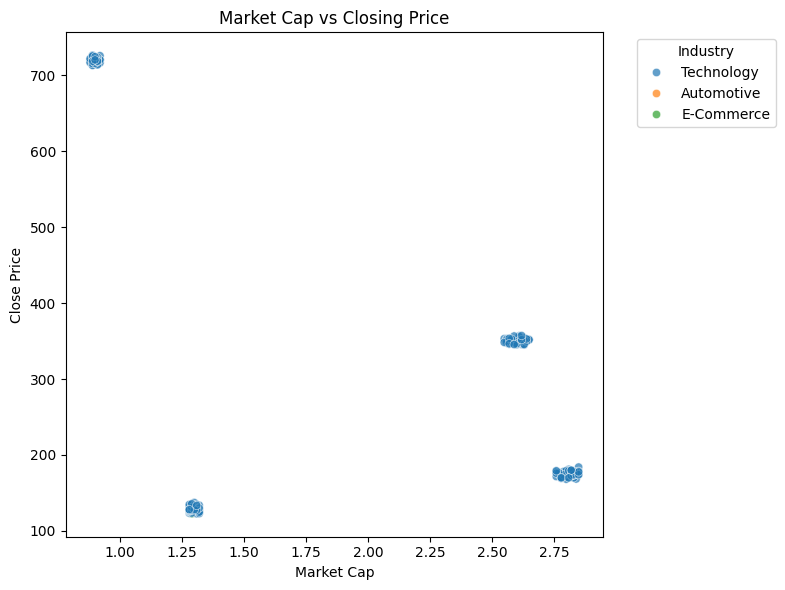

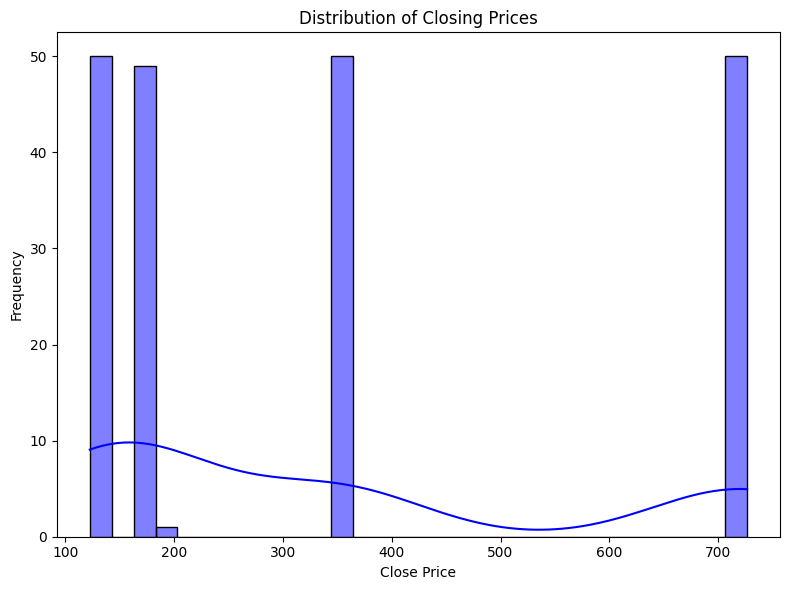

<ipython-input-4-ec2033803d0b>:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Industry', y='Volume', palette='Set3')


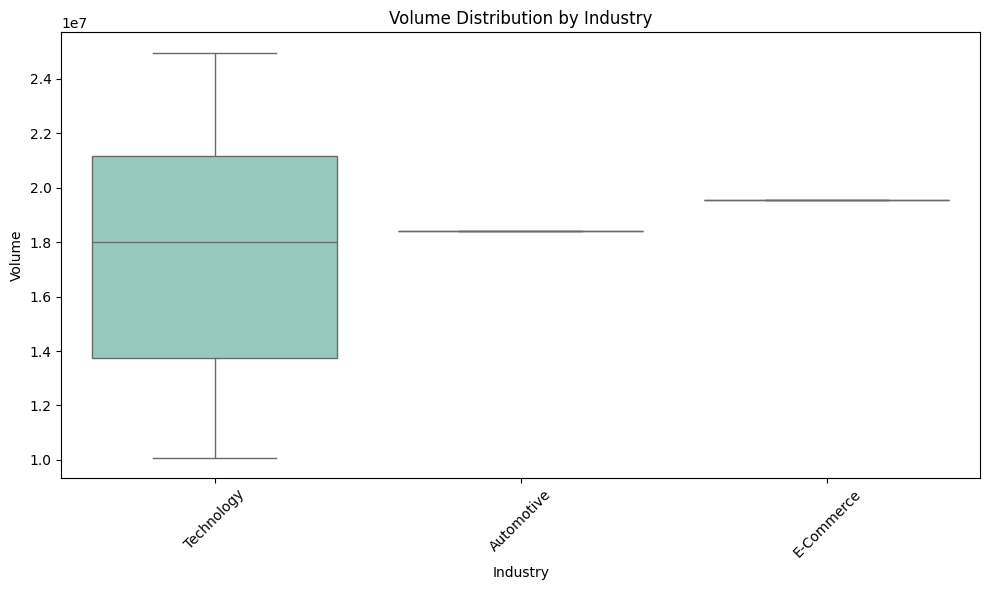

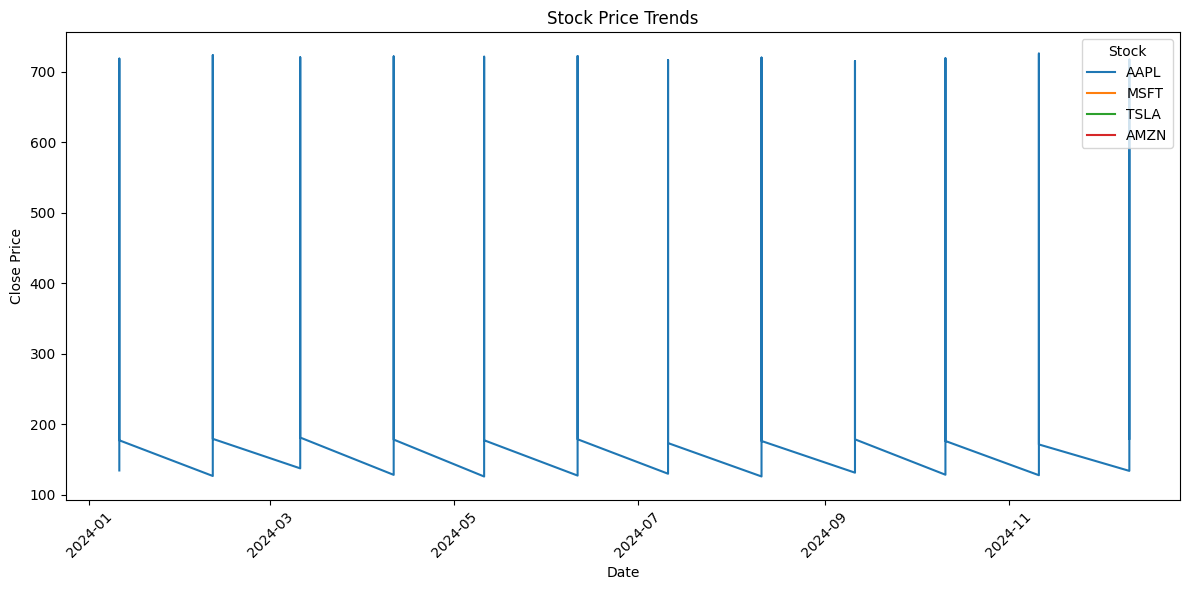

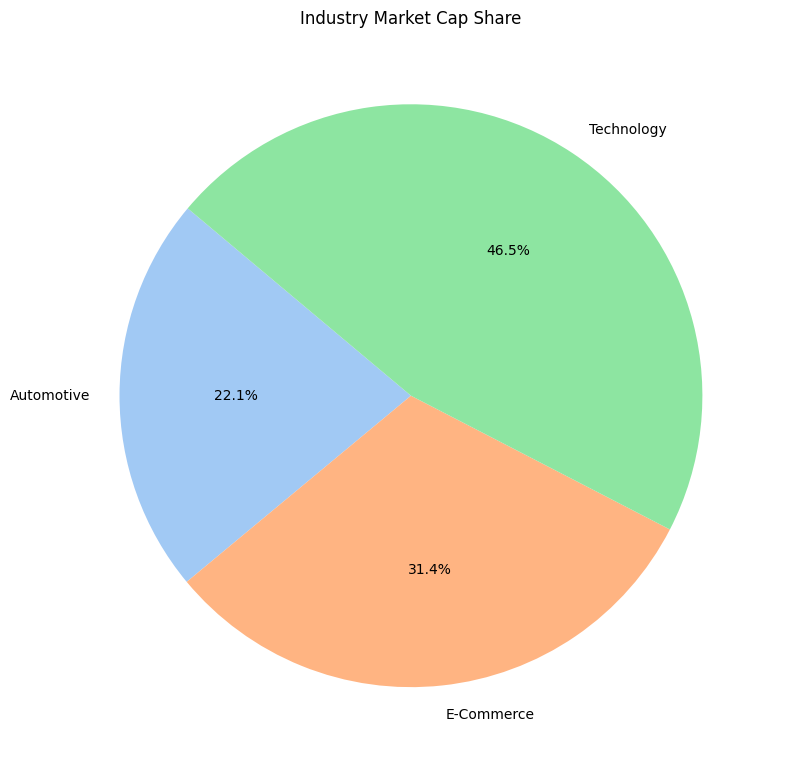

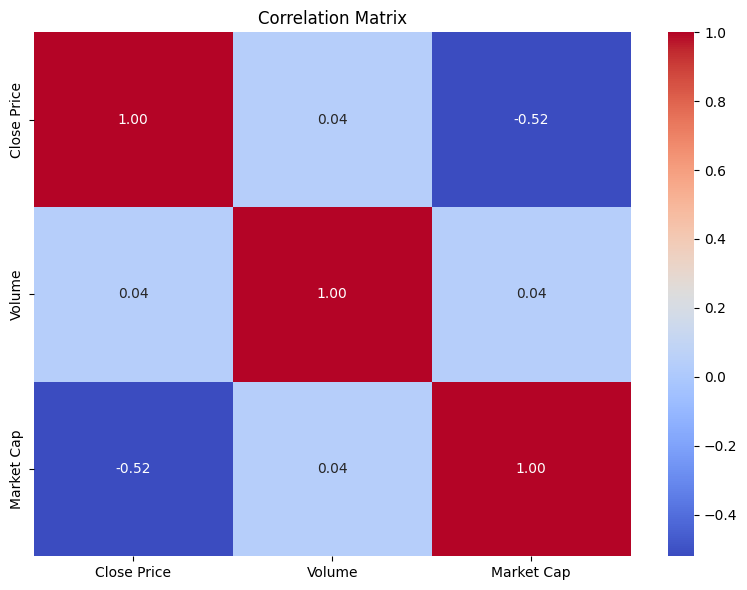

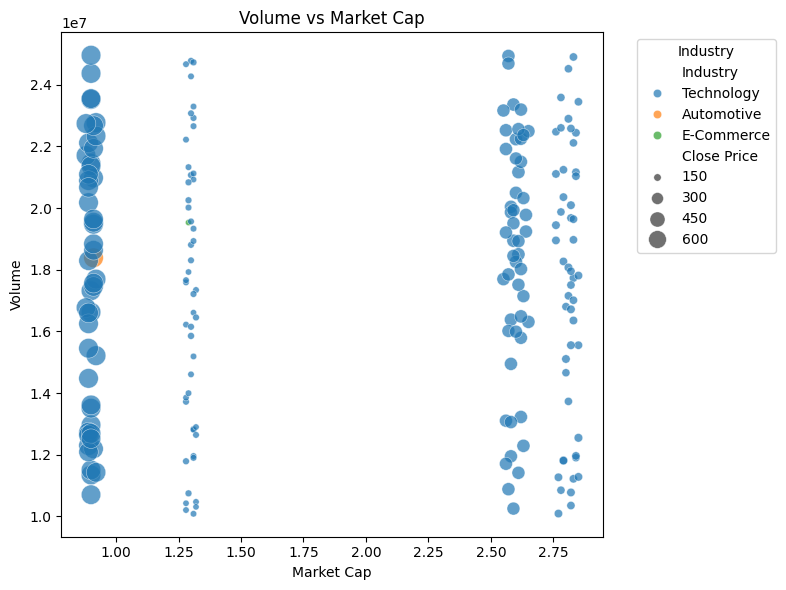

<ipython-input-4-ec2033803d0b>:147: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Industry', y='Close Price', palette='cool')
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 14.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


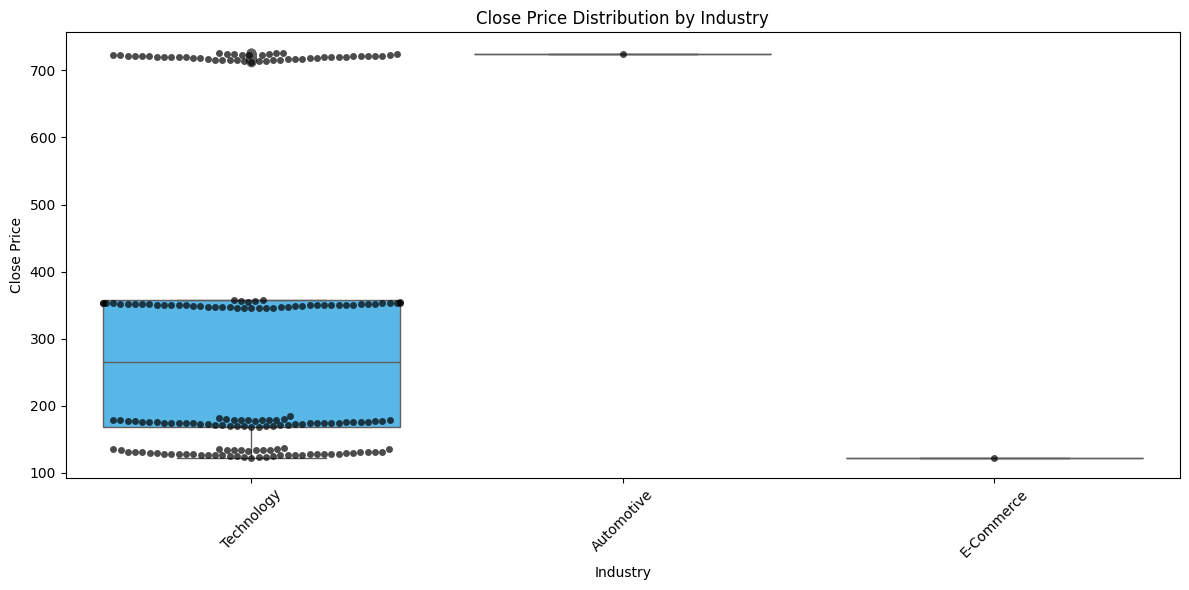

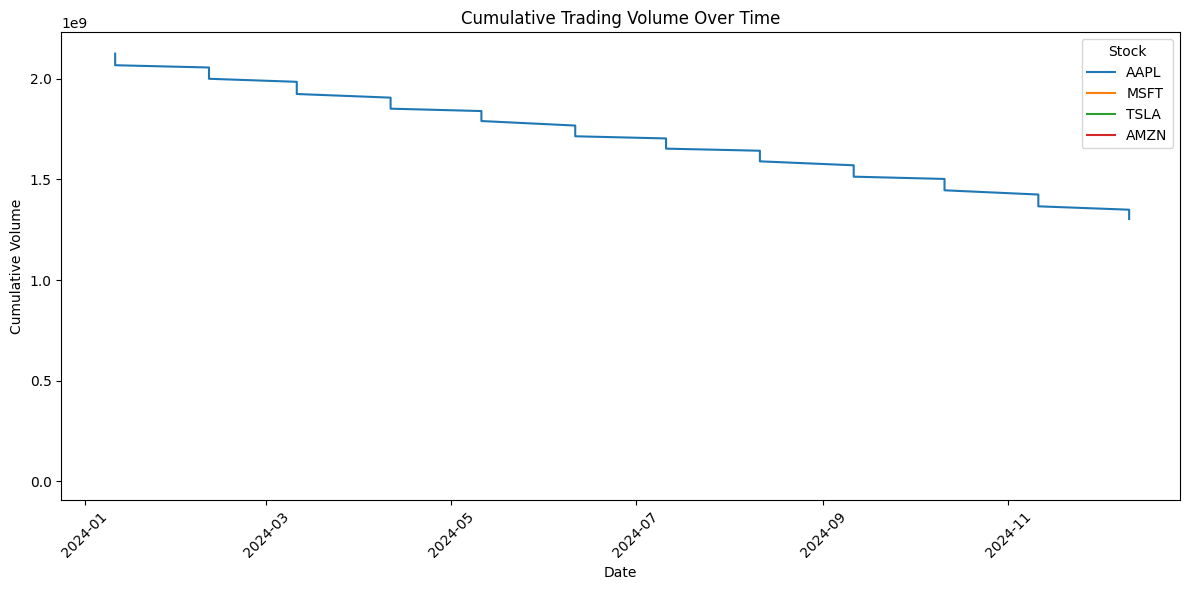

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the file path
file_path = '/content/cleaned_stock_market_dataset.csv'

def load_dataset(path):
    """Load the dataset from the given path."""
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    return pd.read_csv(path)

def preprocess_data(df):
    """Preprocess the dataset."""
    # Rename columns for clarity
    df.rename(columns={
        'Stock Symbol': 'Stock',
        'Close': 'Close Price'
    }, inplace=True)

    # Add an 'Industry' column
    industry_mapping = {
        'AAPL': 'Technology',
        'MSFT': 'Technology',
        'TSLA': 'Automotive',
        'AMZN': 'E-Commerce'
    }
    df['Industry'] = df['Stock'].map(industry_mapping)
    df['Industry'].fillna('Unknown', inplace=True)

    # Ensure numeric conversions
    for col in ['Close Price', 'Volume', 'Market Cap']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Drop rows with missing critical values
    df.dropna(subset=['Close Price', 'Volume', 'Market Cap'], inplace=True)

    # Convert 'Date' to datetime
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    return df

def generate_summary(df):
    """Generate industry-wise summary."""
    return df.groupby('Industry').agg(
        Avg_Close_Price=('Close Price', 'mean'),
        Total_Volume=('Volume', 'sum'),
        Avg_Market_Cap=('Market Cap', 'mean'),
        Count_Stocks=('Stock', 'nunique')
    ).reset_index()

def visualize_data(df, summary):
    """Create visualizations from the dataset and summary."""
    # Average closing price by industry
    plt.figure(figsize=(12, 6))
    sns.barplot(data=summary, x='Industry', y='Avg_Close_Price', palette='viridis')
    plt.title('Average Closing Price by Industry')
    plt.xlabel('Industry')
    plt.ylabel('Average Closing Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Total trading volume by industry
    plt.figure(figsize=(12, 6))
    sns.barplot(data=summary, x='Industry', y='Total_Volume', palette='plasma')
    plt.title('Total Trading Volume by Industry')
    plt.xlabel('Industry')
    plt.ylabel('Total Volume')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Correlation between market cap and closing price
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='Market Cap', y='Close Price', hue='Industry', alpha=0.7)
    plt.title('Market Cap vs Closing Price')
    plt.xlabel('Market Cap')
    plt.ylabel('Close Price')
    plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Distribution of closing prices
    plt.figure(figsize=(8, 6))
    sns.histplot(df['Close Price'], bins=30, kde=True, color='blue')
    plt.title('Distribution of Closing Prices')
    plt.xlabel('Close Price')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Volume distribution by industry
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Industry', y='Volume', palette='Set3')
    plt.title('Volume Distribution by Industry')
    plt.xlabel('Industry')
    plt.ylabel('Volume')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Stock-wise trend analysis
    plt.figure(figsize=(12, 6))
    for stock in df['Stock'].unique():
        stock_data = df[df['Stock'] == stock]
        plt.plot(stock_data['Date'], stock_data['Close Price'], label=stock)
    plt.title('Stock Price Trends')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend(title='Stock')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Industry share in total market cap
    plt.figure(figsize=(8, 8))
    market_cap_share = summary.groupby('Industry')['Avg_Market_Cap'].sum()
    plt.pie(market_cap_share, labels=market_cap_share.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title('Industry Market Cap Share')
    plt.tight_layout()
    plt.show()

    # Heatmap for correlation matrix
    plt.figure(figsize=(8, 6))
    correlation_matrix = df[['Close Price', 'Volume', 'Market Cap']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

    # Volume vs Market Cap scatterplot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='Market Cap', y='Volume', hue='Industry', size='Close Price', alpha=0.7, sizes=(20, 200))
    plt.title('Volume vs Market Cap')
    plt.xlabel('Market Cap')
    plt.ylabel('Volume')
    plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Closing Price by Industry with Swarmplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Industry', y='Close Price', palette='cool')
    sns.swarmplot(data=df, x='Industry', y='Close Price', color='black', alpha=0.7)
    plt.title('Close Price Distribution by Industry')
    plt.xlabel('Industry')
    plt.ylabel('Close Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Cumulative trading volume over time
    plt.figure(figsize=(12, 6))
    df['Cumulative Volume'] = df.groupby('Stock')['Volume'].cumsum()
    for stock in df['Stock'].unique():
        stock_data = df[df['Stock'] == stock]
        plt.plot(stock_data['Date'], stock_data['Cumulative Volume'], label=stock)
    plt.title('Cumulative Trading Volume Over Time')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Volume')
    plt.legend(title='Stock')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def main():
    try:
        # Load and preprocess the data
        df = load_dataset(file_path)
        print("Dataset loaded successfully!")
        df = preprocess_data(df)

        # Generate and display summary
        industry_summary = generate_summary(df)
        print("\nIndustry Summary:")
        print(industry_summary)

        # Save the summary
        industry_summary.to_csv('industry_summary.csv', index=False)
        print("\nIndustry summary saved to 'industry_summary.csv'.")

        # Visualize data
        visualize_data(df, industry_summary)

    except FileNotFoundError as e:
        print(e)
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Run the main function
if __name__ == "__main__":
    main()















